<a href="https://colab.research.google.com/github/keerthikhot/object_detection/blob/main/object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file="/content/drive/MyDrive/deep/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="/content/drive/MyDrive/deep/frozen_inference_graph.pb"

In [4]:
model=cv2.dnn_DetectionModel(frozen_model , config_file)

In [5]:
classLabels=[]
file_name='/content/drive/MyDrive/deep/config.txt'
with open(file_name,'rt')as fpt:
  classLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


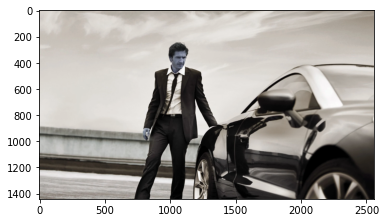

In [8]:
img=cv2.imread('/content/drive/MyDrive/deep/photo.jpg')
plt.imshow(img)

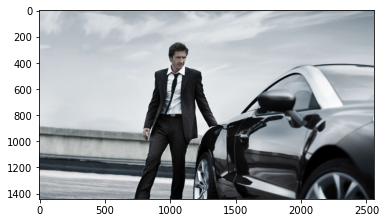

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fb14d5ac3b0>

In [11]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[3 1]


In [13]:
classLabels[2]

'car'

In [14]:
classLabels[0]

'person'

In [15]:
print(confidece)

[0.7062887 0.5310181]


In [16]:
font_scale=10
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex,confidece,bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,0,255),thickness=3)

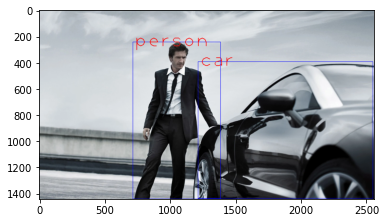

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
 from google.colab.patches import cv2_imshow

[1 1 1 3 1]


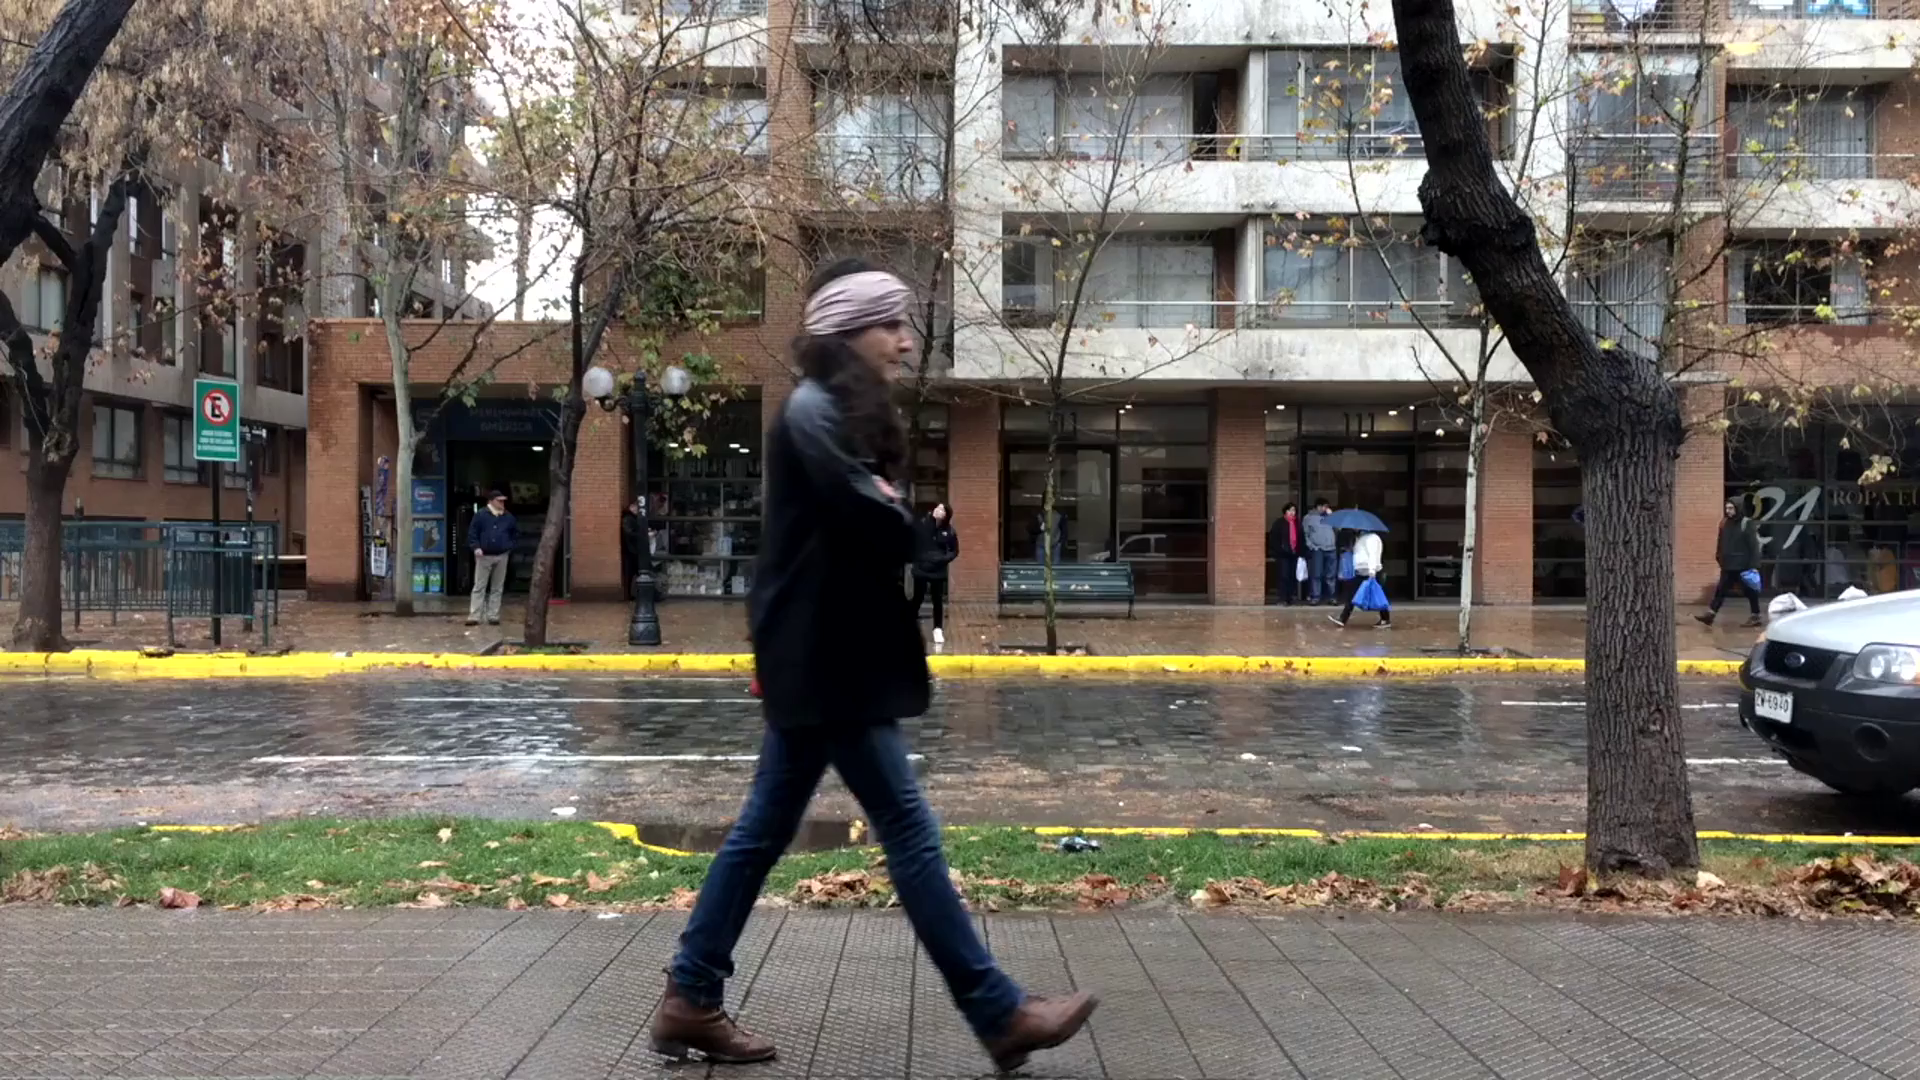

[ 1  1  1  3 10]


In [ ]:
cap=cv2.VideoCapture('/content/drive/MyDrive/deep/Pexels Videos 4698.mp4')
if not cap.isOpened():
  cap=cv2.VideoCapture(0)
if not cap.isOpened():
  raise OSError("can not open webcam")
  
font_sacle=10
font=cv2.FONT_HERSHEY_PLAIN

while True:
  ret,frame=cap.read()

  ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.5)

  print(ClassIndex)
  if(len(ClassIndex)!=0):
    for ClassInd,conf,boxes in zip(ClassIndex,confidece,bbox):
      if(ClassInd <=80):
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,0,255),thickness=3)
  cv2_imshow(frame)
  if cv2.waitKey(2) & 0xFF == ord('q'):
     break

cap.release()
cv2.destroyAllWindows()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')